In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons

In [2]:
x,y = make_moons(n_samples=2000,noise=0.2)

In [3]:

df = pd.DataFrame({
    'x1': x[:, 0],
    'x2': x[:, 1],
    'Y': y
})


In [4]:
dataset = pd.DataFrame(df)

In [5]:
dataset.head(3)

,x1,x2,Y
0,1.112689,-0.464019,1
1,-0.880290,0.485399,0
2,-0.694324,0.721253,0


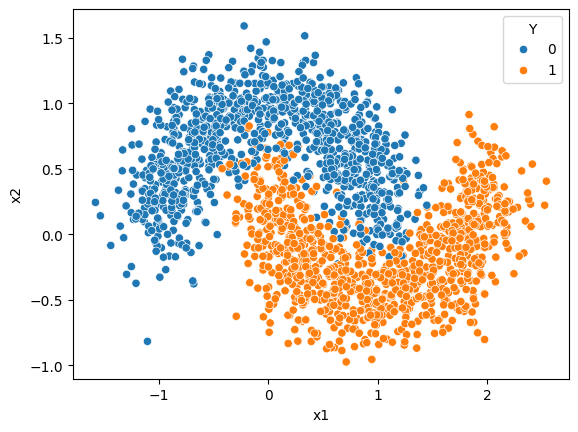

In [6]:
sns.scatterplot(x='x1',y='x2',data=dataset,hue='Y')
plt.show()

In [7]:
x_a = dataset.iloc[:,:-1]
y_a = dataset['Y']

In [8]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_a,y_a,test_size=0.2,random_state=42)

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [13]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)*100,dt.score(x_test,y_test)*100

(100.0, 94.5)

In [15]:
sv = SVC()
sv.fit(x_train,y_train)
sv.score(x_train,y_train)*100,sv.score(x_test,y_test)*100

(97.1875, 95.25)

In [17]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)*100,gnb.score(x_test,y_test)*100

(87.625, 89.25)

# Ensemble Learning

In [19]:
li = [('dt1',DecisionTreeClassifier()),('sv1',SVC()),('gnb1',GaussianNB())]

In [37]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(li)

In [38]:
vc.fit(x_train,y_train)

,estimators,"[('dt1', ...), ('sv1', ...), ...]"
,voting,'hard'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1


In [39]:
vc.score(x_train,y_train)*100,vc.score(x_test,y_test)*100

(97.8125, 94.75)

In [44]:
prd = {
    "dt": dt.predict(x_test),
    "svm": sv.predict(x_test),
    "gnb": gnb.predict(x_test),
    'vc':vc.predict(x_test)
}


In [46]:
pd.DataFrame(prd).head(10)

,dt,svm,gnb,vc
0,1,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
5,1,1,1,1
6,1,1,1,1
7,1,1,1,1
8,0,0,0,0
9,0,0,0,0
